#### Evaluar metricas de desempeño de los modelos entrenados con parámetros por defecto

In [23]:
import pandas as pd
from joblib import load
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

In [24]:
def splitting_binary_data(df):
    binary_cols = df.columns[df.nunique() == 2]
    non_binary_cols = df.columns.difference(binary_cols)

    df_binary = df[binary_cols]
    df_non_binary = df[non_binary_cols]

    return df_binary, df_non_binary

In [25]:
def predict_class(scaler, model, val_data, test_data):
    binary_val, non_binary_val = splitting_binary_data(val_data)
    binary_test, non_binary_test = splitting_binary_data(test_data)

    non_binary_val_scaled = scaler.transform(non_binary_val)
    non_binary_test_scaled = scaler.transform(non_binary_test)

    non_binary_val_scaled_df = pd.DataFrame(non_binary_val_scaled, columns=non_binary_val.columns)
    non_binary_test_scaled_df = pd.DataFrame(non_binary_test_scaled, columns=non_binary_test.columns)

    val_scaled = pd.concat([binary_val, non_binary_val_scaled_df], axis=1)
    test_scaled = pd.concat([binary_test, non_binary_test_scaled_df], axis=1)

    val_predictions = model.predict(X=val_scaled)
    test_predictions = model.predict(X=test_scaled)

    return val_predictions, test_predictions


In [26]:
def metrics_model(predict_val, y_val, dataset, scaler, model):
    acc_value = accuracy_score(y_pred=predict_val, y_true=y_val) 
    recall_value = recall_score(y_pred=predict_val, y_true=y_val, average='weighted')
    precision_value = precision_score(y_pred=predict_val, y_true=y_val, average='weighted') 
    f1_value = f1_score(y_pred=predict_val, y_true=y_val, average='weighted')
    mcc_value = matthews_corrcoef(y_pred=predict_val, y_true=y_val)
    cm = confusion_matrix(y_pred=predict_val, y_true=y_val)
    tn, fp, fn, tp = confusion_matrix(y_pred=predict_val, y_true=y_val).ravel()

    df_metrics = pd.DataFrame([[dataset, scaler, model, acc_value, recall_value, precision_value, f1_value, mcc_value, tn, fp, fn, tp]],
                              columns=["dataset", "scaler", "model", "acc", "recall", "precision", "f1", "mcc", "tn", "fp", "fn", "tp"])

    return df_metrics

##### Cargar escalador

In [27]:
scalers = {"RobustScaler": load("results/scaler_robust.joblib")}

##### Cargar modelos entrenados

In [28]:
models = {
    "KNN": load("results/knn_model.joblib"),
    "DT": load("results/dt_model.joblib"),
    "SVM": load("results/svm_model.joblib"),
    "ADA": load("results/ada_model.joblib"),
    "GBC": load("results/gbc_model.joblib"),
    "ETC": load("results/rf_model.joblib")
}

##### Leer datos y respuestas de validación y testeo

In [29]:
val_data = pd.read_csv("process_dataset/val_data.csv")
test_data = pd.read_csv("process_dataset/test_data.csv")

y_val = np.load("process_dataset/y_val.npy")
y_test = np.load("process_dataset/y_test.npy")

##### Aplicar metricas a los modelos

In [30]:
results = []

for scaler_name, scaler_instance in scalers.items():
    for model_name, model in models.items():
        predict_val, predict_test = predict_class(scaler_instance, model, val_data, test_data)
        results.append(metrics_model(predict_val, y_val, "Validation", scaler_name, model_name))
        results.append(metrics_model(predict_test, y_test, "Test", scaler_name, model_name))

/home/nsoto/miniconda3/envs/ml/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/nsoto/miniconda3/envs/ml/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/nsoto/miniconda3/envs/ml/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/nsoto/miniconda3/envs/ml/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/nsoto/miniconda3/envs/ml/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/nsoto/miniconda3/envs/ml/lib/python3.13/site-packages/sklearn/base.py:486: UserWarni

In [31]:
df_result = pd.concat(results)
df_result = df_result.reset_index(drop=True)

##### Visualizar resultados

In [32]:
df_result

,dataset,scaler,model,acc,recall,precision,f1,mcc,tn,fp,fn,tp
0,Validation,RobustScaler,KNN,0.512389,0.512389,0.514236,0.512702,0.025664,279,256,295,300
1,Test,RobustScaler,KNN,0.501592,0.501592,0.501613,0.501601,0.003063,154,156,157,161
2,Validation,RobustScaler,DT,0.515929,0.515929,0.516436,0.516134,0.030132,267,268,279,316
3,Test,RobustScaler,DT,0.531847,0.531847,0.532714,0.531063,0.064977,178,132,162,156
4,Validation,RobustScaler,SVM,0.499115,0.499115,0.500806,0.499454,-0.001208,270,265,301,294
5,Test,RobustScaler,SVM,0.496815,0.496815,0.497327,0.496218,-0.005491,165,145,171,147
6,Validation,RobustScaler,ADA,0.487611,0.487611,0.491805,0.486378,-0.019003,292,243,336,259
7,Test,RobustScaler,ADA,0.523885,0.523885,0.524523,0.523372,0.048736,173,137,162,156
8,Validation,RobustScaler,GBC,0.484071,0.484071,0.487784,0.483299,-0.027035,285,250,333,262
9,Test,RobustScaler,GBC,0.498408,0.498408,0.499147,0.497040,-0.001856,171,139,176,142


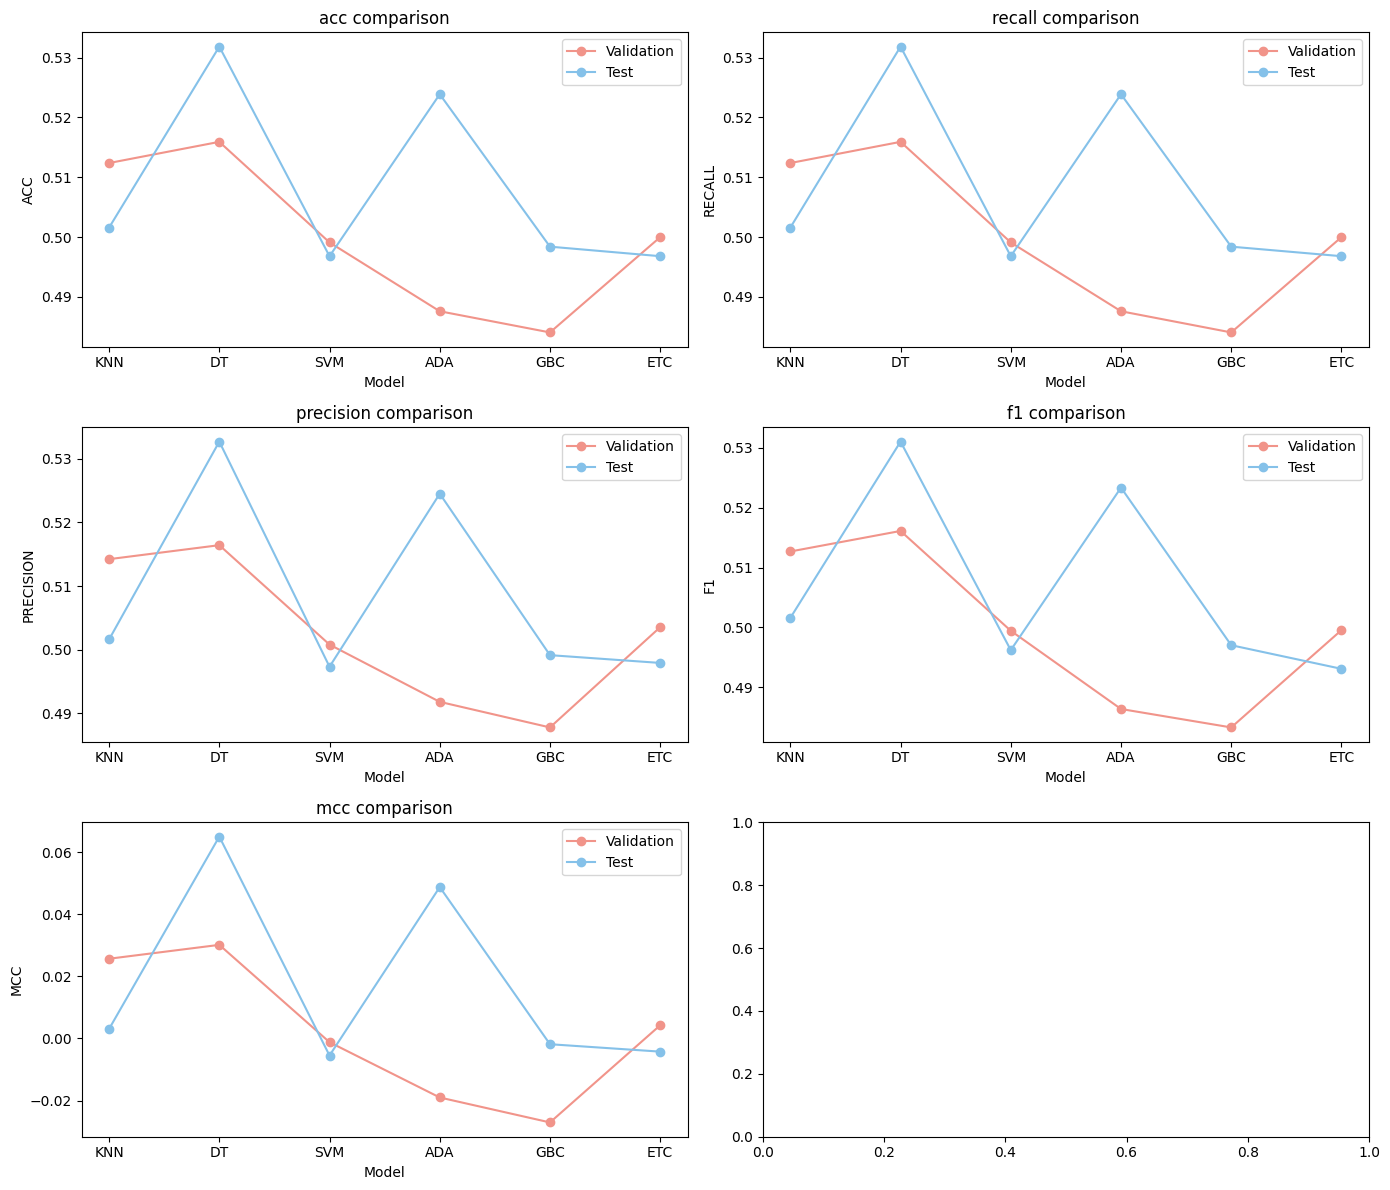

In [33]:

colors = ["#F1948A", "#85C1E9"]

val_df = df_result[df_result['dataset'] == 'Validation']
test_df = df_result[df_result['dataset'] == 'Test']

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
metrics = ['acc', 'recall', 'precision', 'f1', 'mcc']

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    axes[row, col].plot(val_df['model'], val_df[metric], label='Validation', marker='o', color=colors[0])
    axes[row, col].plot(test_df['model'], test_df[metric], label='Test', marker='o', color=colors[1])
    axes[row, col].set_title(f'{metric} comparison')
    axes[row, col].set_xlabel('Model')
    axes[row, col].set_ylabel(metric.upper())
    axes[row, col].legend()

plt.tight_layout()
plt.show()